# Introduction: Analysis of real estate data

In this jupyter notebook we will take a closer look into our scraped real estate data in order to get some insights on real estate market in Serbia. We will investigate both the apartments and the houses for a sale and for a rent, accross the whole Serbia.

In [1]:
# Importting libraries
import json
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading db connection parameters from json file
db_params = None
with open('../database/db_connetion.json') as db_file:
    # Loading db connection parameters 
    db_params = json.load(db_file)

In [3]:
# Connecting to the database
conn = psycopg2.connect(
    host=db_params['host'], 
    port=db_params['port'], 
    database=db_params['database'], 
    user=db_params['user'], 
    password=db_params['password']
    )

In [4]:
# Getting the real estate data from database
real_estate = pd.read_sql_query('Select * from real_estate', conn)

# 1. General listing information

## Number of real estate properties for sale and for rent

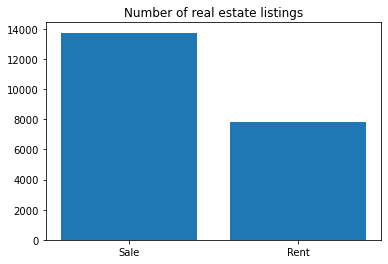

In [5]:
num_listings_for_sale = real_estate[real_estate['listing_type'] == 's'].shape[0]
num_listings_for_rent = real_estate[real_estate['listing_type'] == 'r'].shape[0]

plt.bar(['Sale', 'Rent'], [num_listings_for_sale, num_listings_for_rent])
plt.title('Number of real estate listings')
plt.show()

## List of top cities by the amount of real estate ads for sale

In [6]:
real_estate[real_estate['listing_type'] == 's'].groupby(['location_city']).count().sort_values('id', ascending=False)['id'].head(50)

location_city
beograd                6433
novi sad               3380
nis                     958
kragujevac              641
subotica                247
stara pazova            104
zrenjanin               100
indjija                  74
vrnjacka banja           66
sombor                   64
zlatibor                 49
kraljevo                 44
sabac                    37
irig                     35
ruma                     35
pancevo                  34
arandjelovac             32
sremska mitrovica        27
vranje                   27
smederevo                26
beocin                   26
valjevo                  25
cacak                    25
sopot                    24
ub                       24
sremski karlovci         23
loznica                  23
pantelej                 22
velika plana             21
krusevac                 18
kopaonik                 18
backa palanka            17
leskovac                 17
kovin                    16
backa topola             16
sremsk

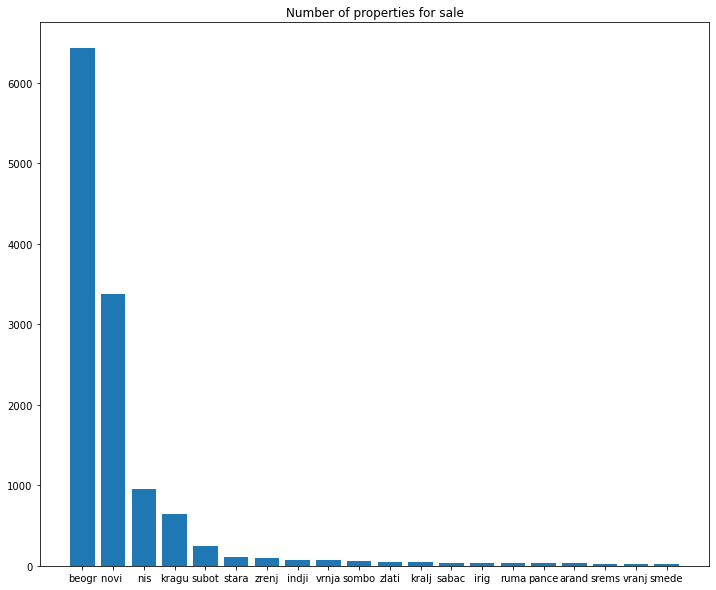

In [7]:
top_cities = real_estate[real_estate['listing_type'] == 's'].groupby(['location_city']).count().sort_values('id', ascending=False).head(20)
plt.figure(figsize=(12,10)) 
plt.bar(list(map(lambda city_name:city_name[:5], top_cities.index)), top_cities['id'])
plt.title('Number of properties for sale')
plt.show()

## Registrated apartments and houses

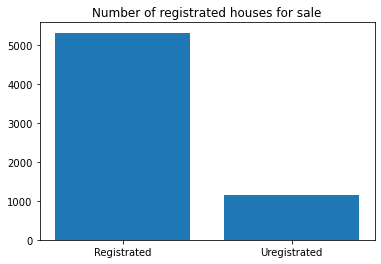

In [8]:
registrated_houses = real_estate[(real_estate['listing_type'] == 's') & (real_estate['property_type'] == 'h') & (real_estate['registered'] == True)].shape[0]
unregistrated_houses = real_estate[(real_estate['listing_type'] == 's') & (real_estate['property_type'] == 'h') & (real_estate['registered'] == False)].shape[0]

plt.bar(['Registrated', 'Uregistrated'], [registrated_houses, unregistrated_houses])
plt.title('Number of registrated houses for sale')
plt.show()

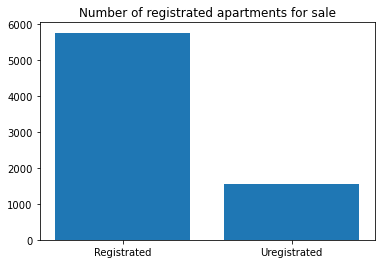

In [9]:
registrated_apartments = real_estate[(real_estate['listing_type'] == 's') & (real_estate['property_type'] == 'a') & (real_estate['registered'] == True)].shape[0]
unregistrated_apartments = real_estate[(real_estate['listing_type'] == 's') & (real_estate['property_type'] == 'a') & (real_estate['registered'] == False)].shape[0]

plt.bar(['Registrated', 'Uregistrated'], [registrated_apartments, unregistrated_apartments])
plt.title('Number of registrated apartments for sale')
plt.show()

# 2. Pricing information

## Top 20 most expensive apartments for sale

In [10]:
real_estate[(real_estate['listing_type'] == 's') & (real_estate['property_type'] == 'a')].sort_values('price', ascending=False).head(20)

,id,listing_type,property_type,price,location_city,location_city_district,area_property,area_land,construction_type,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms,source
5482,5640,s,a,2500000.0,beograd,savski venac,650.0,NaN,None,NaN,NaN,False,None,5.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
1370,1539,s,a,1500000.0,beograd,savski venac,289.0,NaN,None,3.0,2.0,False,Gas,5.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
5773,5936,s,a,1500000.0,beograd,savski venac,284.0,NaN,2019,3.0,1.0,False,Centralno,5.0,2.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
2614,2784,s,a,1500000.0,beograd,savski venac,288.0,NaN,2019,NaN,0.0,False,None,4.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
5291,5450,s,a,1419235.0,nis,gradske lokacije,39.0,NaN,2019,4.0,4.0,True,None,1.5,1.0,https://www.4zida.rs/prodaja/stanovi/nis/oglas...
1528,1697,s,a,1338888.0,beograd,savski venac,162.0,NaN,None,NaN,14.0,True,Centralno,4.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
1524,1694,s,a,1338888.0,beograd,savski venac,162.0,NaN,None,NaN,14.0,True,Centralno,4.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
3367,3529,s,a,1292888.0,beograd,savski venac,156.0,NaN,None,NaN,16.0,True,Centralno,4.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
1527,1696,s,a,1244888.0,beograd,savski venac,161.0,NaN,None,NaN,14.0,True,Centralno,4.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
1526,1695,s,a,1240888.0,beograd,savski venac,151.0,NaN,None,NaN,14.0,True,Centralno,4.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...


## Top 20 most expensive houses for sale

In [11]:
real_estate[(real_estate['listing_type'] == 's') & (real_estate['property_type'] == 'h')].sort_values('price', ascending=False).head(20)

,id,listing_type,property_type,price,location_city,location_city_district,area_property,area_land,construction_type,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms,source
12408,12907,s,h,15000000.0,beograd,savski venac,3074.0,13.0,2019,NaN,NaN,False,Podno,NaN,1.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
12892,13397,s,h,5000000.0,beograd,savski venac,1500.0,1150.0,2016,NaN,NaN,True,None,NaN,1.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
11326,11800,s,h,5000000.0,beograd,savski venac,1150.0,27.0,2008,NaN,NaN,True,Etažno,NaN,5.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
11088,11557,s,h,4500000.0,beograd,savski venac,850.0,29.0,None,NaN,NaN,True,Etažno,NaN,1.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
13631,14156,s,h,4500000.0,beograd,savski venac,600.0,56.0,1995,NaN,NaN,True,Etažno,NaN,1.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
7733,8069,s,h,4000000.0,beograd,savski venac,1338.0,10.0,2019,NaN,NaN,True,None,NaN,1.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
8018,8364,s,h,4000000.0,beograd,savski venac,850.0,15.0,None,NaN,NaN,True,Etažno,NaN,4.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
11102,11572,s,h,3990000.0,beograd,savski venac,800.0,32.0,None,NaN,NaN,False,Struja,NaN,1.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
11327,11801,s,h,3900000.0,beograd,savski venac,900.0,10.9,2006,NaN,NaN,True,Etažno,NaN,6.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
7854,8196,s,h,3800000.0,beograd,savski venac,920.0,NaN,None,NaN,NaN,True,Centralno,NaN,1.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...


## Top 20 most expensive apartments for rent

In [12]:
real_estate[(real_estate['listing_type'] == 'r') & (real_estate['property_type'] == 'a')].sort_values('price', ascending=False).head(20)

,id,listing_type,property_type,price,location_city,location_city_district,area_property,area_land,construction_type,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms,source
19140,19929,r,a,7500.0,beograd,savski venac,500.0,NaN,None,NaN,1.0,False,Gas,4.0,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
17716,18472,r,a,7400.0,beograd,vracar,370.0,NaN,None,6.0,6.0,False,Etažno,5.0,4.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
16721,17425,r,a,6500.0,beograd,savski venac,250.0,NaN,None,NaN,3.0,False,Centralno,5.0,3.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
18195,18971,r,a,5000.0,beograd,vracar,260.0,NaN,None,NaN,3.0,True,Centralno,5.0,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
19960,20753,r,a,5000.0,beograd,novi beograd,300.0,NaN,2000,NaN,1.0,False,Centralno,4.0,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
15241,15890,r,a,5000.0,beograd,vracar,212.0,NaN,None,NaN,NaN,False,Centralno,4.0,3.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
15899,16564,r,a,5000.0,beograd,vracar,212.0,NaN,None,6.0,5.0,True,Centralno,4.0,3.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
14084,14703,r,a,5000.0,beograd,savski venac,400.0,NaN,None,NaN,NaN,False,Centralno,6.5,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
17667,18421,r,a,4500.0,beograd,vracar,297.0,NaN,None,NaN,NaN,False,None,4.0,3.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
19882,20675,r,a,4500.0,beograd,savski venac,260.0,NaN,None,NaN,4.0,True,Etažno,7.0,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...


## Top 20 most expensive houses for rent

In [13]:
real_estate[(real_estate['listing_type'] == 'r') & (real_estate['property_type'] == 'h')].sort_values('price', ascending=False).head(20)

,id,listing_type,property_type,price,location_city,location_city_district,area_property,area_land,construction_type,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms,source
14158,14778,r,h,15000.0,beograd,savski venac,1200.0,NaN,None,NaN,NaN,False,Centralno,NaN,1.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
14034,14652,r,h,15000.0,beograd,savski venac,1154.0,7.0,None,NaN,NaN,False,Etažno,NaN,1.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
14108,14727,r,h,15000.0,beograd,savski venac,1154.0,NaN,None,NaN,NaN,True,Etažno,NaN,1.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
13969,14583,r,h,15000.0,beograd,savski venac,1154.0,NaN,None,NaN,NaN,True,None,NaN,11.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
14099,14718,r,h,14600.0,beograd,stari grad,1100.0,NaN,None,NaN,NaN,False,None,NaN,1.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
13786,14378,r,h,14000.0,beograd,savski venac,800.0,20.0,None,NaN,NaN,False,Gas,NaN,9.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
14191,14812,r,h,12000.0,beograd,savski venac,826.0,NaN,None,NaN,NaN,False,None,NaN,5.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
13777,14369,r,h,10000.0,beograd,savski venac,1200.0,NaN,None,NaN,NaN,True,Struja,NaN,1.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
13789,14382,r,h,10000.0,beograd,savski venac,600.0,NaN,None,NaN,NaN,True,None,NaN,5.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
14168,14788,r,h,10000.0,beograd,palilula,1000.0,NaN,None,NaN,NaN,False,Centralno,NaN,12.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...


## Real estate (apartments, houses) for sale, constructed in the year of 2019

In [14]:
real_estate[(real_estate['construction_type'] == '2019') & (real_estate['listing_type'] == 's')].sort_values('price', ascending=False).head(20)

,id,listing_type,property_type,price,location_city,location_city_district,area_property,area_land,construction_type,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms,source
12408,12907,s,h,15000000.0,beograd,savski venac,3074.0,13.0,2019,NaN,NaN,False,Podno,NaN,1.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
7733,8069,s,h,4000000.0,beograd,savski venac,1338.0,10.0,2019,NaN,NaN,True,None,NaN,1.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
5773,5936,s,a,1500000.0,beograd,savski venac,284.0,NaN,2019,3.0,1.0,False,Centralno,5.0,2.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
2614,2784,s,a,1500000.0,beograd,savski venac,288.0,NaN,2019,NaN,0.0,False,None,4.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
5291,5450,s,a,1419235.0,nis,gradske lokacije,39.0,NaN,2019,4.0,4.0,True,None,1.5,1.0,https://www.4zida.rs/prodaja/stanovi/nis/oglas...
2624,2794,s,a,750000.0,beograd,savski venac,192.0,NaN,2019,5.0,5.0,False,Centralno,5.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
8876,9260,s,h,738000.0,novi sad,sremska kamenica,738.0,14.0,2019,NaN,NaN,True,Centralno,NaN,5.0,https://www.4zida.rs/prodaja/kuce/novi-sad/ogl...
2899,3066,s,a,617888.0,beograd,savski venac,141.0,NaN,2019,17.0,13.0,False,Centralno,3.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
3437,3599,s,a,594000.0,beograd,savski venac,135.0,NaN,2019,3.0,1.0,True,Podno,2.5,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
6643,6810,s,a,575500.0,beograd,stari grad,325.0,NaN,2019,6.0,6.0,False,Centralno,5.0,3.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...


## Real estate (apartments, houses) for rent, constructed in the year of 2019

In [15]:
real_estate[(real_estate['construction_type'] == '2019') & (real_estate['listing_type'] == 'r')].sort_values('price', ascending=False).head(20)

,id,listing_type,property_type,price,location_city,location_city_district,area_property,area_land,construction_type,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms,source
14255,14876,r,h,10000.0,beograd,savski venac,826.0,NaN,2019,NaN,NaN,True,None,NaN,1.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
18901,19687,r,a,4500.0,beograd,savski venac,266.0,NaN,2019,3.0,2.0,False,Gas,4.0,3.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
19959,20752,r,a,4000.0,beograd,savski venac,279.0,NaN,2019,3.0,2.0,False,None,5.0,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
19955,20748,r,a,3000.0,beograd,savski venac,257.0,NaN,2019,3.0,0.0,False,None,4.0,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
19962,20755,r,a,3000.0,beograd,savski venac,248.0,NaN,2019,3.0,0.0,False,None,4.0,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
19961,20754,r,a,3000.0,beograd,savski venac,264.0,NaN,2019,3.0,2.0,False,None,5.0,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
19957,20750,r,a,3000.0,beograd,savski venac,288.0,NaN,2019,3.0,1.0,False,None,5.0,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
19956,20749,r,a,3000.0,beograd,savski venac,270.0,NaN,2019,3.0,1.0,False,None,5.0,1.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
14667,15298,r,a,1950.0,novi sad,adamovicevo naselje,220.0,NaN,2019,8.0,7.0,False,Centralno,5.0,4.0,https://www.4zida.rs/izdavanje/stanovi/novi-sa...
20118,20925,r,a,1800.0,beograd,savski venac,90.0,NaN,2019,23.0,13.0,True,Centralno,3.5,2.0,https://www.4zida.rs/izdavanje/stanovi/beograd...


# 3. Other information

## Top 20 properties by number of rooms 

In [16]:
real_estate.sort_values('num_rooms', ascending=False).head(20)

,id,listing_type,property_type,price,location_city,location_city_district,area_property,area_land,construction_type,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms,source
1401,1570,s,a,120000.0,stara pazova,stara pazova opstina,300.0,NaN,None,1.0,0.0,True,Gas,8.0,2.0,https://www.4zida.rs/prodaja/stanovi/stara-paz...
17608,18351,r,a,1500.0,beograd,vozdovac,250.0,NaN,2005,2.0,0.0,False,Etažno,8.0,2.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
4804,4965,s,a,450000.0,beograd,savski venac,232.0,NaN,2013,NaN,0.0,True,Etažno,8.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
1302,1468,s,a,750000.0,beograd,savski venac,250.0,NaN,None,NaN,2.0,True,Etažno,8.0,2.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
16844,17550,r,a,90.0,beograd,grocka,180.0,NaN,None,2.0,1.0,False,TA peć,8.0,2.0,https://www.4zida.rs/izdavanje/stanovi/beograd...
1349,1516,s,a,173350.0,novi sad,novi sad - centar,153.0,NaN,None,2.0,0.0,True,Struja,8.0,8.0,https://www.4zida.rs/prodaja/stanovi/novi-sad/...
2619,2789,s,a,600000.0,beograd,stari grad,252.0,NaN,2010,4.0,4.0,False,Centralno,8.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
5327,5485,s,a,115000.0,nis,medijana,204.0,NaN,None,NaN,3.0,True,Struja,8.0,1.0,https://www.4zida.rs/prodaja/stanovi/nis/oglas...
6384,6551,s,a,1000000.0,beograd,vracar,300.0,NaN,1923,2.0,2.0,True,Etažno,8.0,1.0,https://www.4zida.rs/prodaja/stanovi/beograd/o...
19840,20632,r,a,800.0,nis,medijana,200.0,NaN,None,1.0,1.0,True,Struja,7.0,1.0,https://www.4zida.rs/izdavanje/stanovi/nis/ogl...


## Top 20 properties by number of bathrooms

In [17]:
real_estate.sort_values('num_bathrooms', ascending=False).head(20)

,id,listing_type,property_type,price,location_city,location_city_district,area_property,area_land,construction_type,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms,source
12168,12660,s,h,106000.0,sabac,sabac opstina,363.0,685.0,1975,NaN,NaN,True,Etažno,NaN,21.0,https://www.4zida.rs/prodaja/kuce/sabac-opstin...
14168,14788,r,h,10000.0,beograd,palilula,1000.0,NaN,None,NaN,NaN,False,Centralno,NaN,12.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
13969,14583,r,h,15000.0,beograd,savski venac,1154.0,NaN,None,NaN,NaN,True,None,NaN,11.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
13867,14464,r,h,5000.0,beograd,novi beograd,930.0,2600.0,2018,NaN,NaN,False,None,NaN,10.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
13786,14378,r,h,14000.0,beograd,savski venac,800.0,20.0,None,NaN,NaN,False,Gas,NaN,9.0,https://www.4zida.rs/izdavanje/kuce/beograd/og...
12618,13119,s,h,1339000.0,novi sad,telep,708.0,2626.0,None,NaN,NaN,True,Gas,NaN,9.0,https://www.4zida.rs/prodaja/kuce/novi-sad/ogl...
11059,11529,s,h,415900.0,dolovo,pancevo opstina,400.0,4.0,2010,NaN,NaN,True,None,NaN,9.0,https://www.4zida.rs/prodaja/kuce/kopaonik-ops...
11587,12069,s,h,360000.0,novi sad,veternik,693.0,500.0,2010,NaN,NaN,True,Etažno,NaN,9.0,https://www.4zida.rs/prodaja/kuce/novi-sad/ogl...
13348,13862,s,h,277000.0,beo,srbija,550.0,NaN,None,NaN,NaN,True,None,NaN,8.0,https://www.4zida.rs/prodaja/kuce/subotica-ops...
7538,7872,s,h,400000.0,zlatibor,zlatibor opstina,500.0,NaN,None,NaN,NaN,True,None,NaN,8.0,https://www.4zida.rs/prodaja/kuce/zlatibor-ops...


## Top 20 houses by land area

In [18]:
real_estate.sort_values('area_land', ascending=False).head(20)

,id,listing_type,property_type,price,location_city,location_city_district,area_property,area_land,construction_type,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms,source
12453,12953,s,h,22000.0,kraljevo,kraljevo opstina,60.0,443036.0,None,NaN,NaN,True,None,NaN,1.0,https://www.4zida.rs/prodaja/kuce/kraljevo-ops...
10831,11298,s,h,35000.0,kladovo,kladovo opstina,100.0,320000.0,1960,NaN,NaN,True,None,NaN,1.0,https://www.4zida.rs/prodaja/kuce/kladovo-opst...
11019,11487,s,h,270000.0,ruma,ruma opstina,258.0,100000.0,2012,NaN,NaN,True,Centralno,NaN,1.0,https://www.4zida.rs/prodaja/kuce/ruma-opstina...
8403,8763,s,h,40000.0,beograd,barajevo,170.0,65300.0,1994,NaN,NaN,True,None,NaN,2.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
13486,14002,s,h,930000.0,beograd,zvezdara,536.0,40000.0,2014,NaN,NaN,True,Centralno,NaN,5.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
13480,13996,s,h,147600.0,beograd,zvezdara,123.0,36000.0,None,NaN,NaN,True,None,NaN,3.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
13483,13999,s,h,140000.0,beograd,surcin,221.0,34000.0,None,NaN,NaN,True,None,NaN,2.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
9025,9411,s,h,330000.0,rudnik,gornji milanovac opstina,250.0,30000.0,None,NaN,NaN,False,None,NaN,1.0,https://www.4zida.rs/prodaja/kuce/uzice-opstin...
13027,13535,s,h,45000.0,beograd,obrenovac,59.0,22200.0,1980,NaN,NaN,False,None,NaN,1.0,https://www.4zida.rs/prodaja/kuce/beograd/ogla...
10546,11008,s,h,33000.0,subotica,subotica opstina,100.0,17000.0,None,NaN,NaN,True,Struja,NaN,1.0,https://www.4zida.rs/prodaja/kuce/subotica-ops...
